# <b>    Problem Statement:

The goal of this project is to develop a predictive model using Linear Regression, Ridge and Lasso Regression to forecast future stock prices for a given company. The model will analyze historical stock price data, along with relevant financial indicators and technical indicators, to make accurate predictions of the company's stock prices over a specified time horizon.

Problem Description:

Stock price prediction is a critical task in financial markets as it helps investors and traders make informed decisions about buying, selling, or holding stock positions. The primary objective of this project is to create a reliable and accurate model that can forecast stock prices for a particular company.

### 1) LINEAR REGRESSION

In [3436]:
# Loading the required libraries 
import yfinance as yf

import numpy as np 
import pandas as pd
import pandas_ta as ta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

import warnings
warnings.filterwarnings('ignore')

### yfinance is opensource library used to scrape the financial data from yahoo finance which offers excellent range of market data like stocks, bonds, cyroptocurruncies. The %matplotlib command is to view the plotting results just below the code.

In [3437]:
# Lets download the data of 'SBIN' stock from yfinance library

start_date = datetime.datetime(2000,7,18)
end_date = datetime.datetime(2023,7,18)

ticker_symbol = 'SBIN.NS'

data = yf.download(ticker_symbol, start=start_date, end=end_date)

data = data.reset_index()
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-07-18,21.040514,22.172739,21.040514,21.738720,15.594058,40897655
1,2000-07-19,21.748156,21.951012,20.875399,21.064102,15.110126,14818453
2,2000-07-20,21.078255,21.219784,20.545166,20.743305,14.880004,18257784
3,2000-07-21,20.851810,20.946161,20.483837,20.568754,14.754794,13027046
4,2000-07-24,20.427225,20.427225,18.733606,18.875134,13.539894,16063259


### The data is downloaded for 'State Bank of India' stock from last 20 years.

In [3438]:
# Lets check the shape of the data
data.shape

(5738, 7)

### We can see there are 5738 rows and 6 columns present in the dataset

In [3439]:
# Lets check the general information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5738 entries, 0 to 5737
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5738 non-null   datetime64[ns]
 1   Open       5738 non-null   float64       
 2   High       5738 non-null   float64       
 3   Low        5738 non-null   float64       
 4   Close      5738 non-null   float64       
 5   Adj Close  5738 non-null   float64       
 6   Volume     5738 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 313.9 KB


### There are no null values present in the data. All the values are of float64 datatypes except the values from column volume.

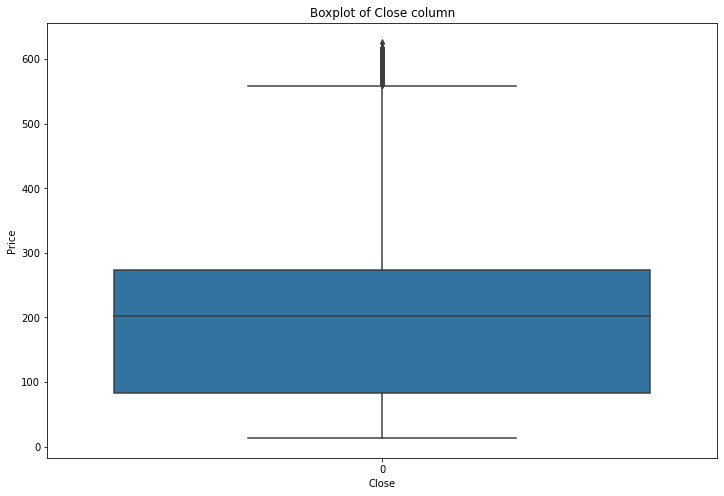

In [3440]:
### Checking the statistical destribution of the Close column
plt.figure(figsize=[12,8])
sns.boxplot(data=data['Close'])
plt.xlabel('Close')
plt.ylabel('Price')
plt.title('Boxplot of Close column')
plt.show()

In [3441]:
# Statistical Distribution of data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5738.000000,5738.000000,5738.000000,5738.000000,5738.000000,5.738000e+03
mean,203.015392,205.766019,199.935246,202.743252,186.482200,2.342533e+07
std,139.633383,141.029303,137.998161,139.482275,137.970784,1.869488e+07
min,13.478195,13.959390,13.214009,13.346102,9.799649,0.000000e+00
25%,83.498058,84.331894,81.757259,83.153673,67.038628,1.222116e+07
50%,203.137505,205.800003,199.085007,203.007500,181.884155,1.854260e+07
75%,274.159996,277.146248,270.143745,273.850006,256.196594,2.884674e+07
max,625.549988,629.549988,617.500000,625.500000,613.576660,2.626771e+08


### There are no outliers present in the data.

In [3442]:
# Setting the Date column as index of dataframe
data.set_index(pd.DatetimeIndex(data['Date']), inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-07-18,2000-07-18,21.040514,22.172739,21.040514,21.738720,15.594058,40897655
2000-07-19,2000-07-19,21.748156,21.951012,20.875399,21.064102,15.110126,14818453
2000-07-20,2000-07-20,21.078255,21.219784,20.545166,20.743305,14.880004,18257784
2000-07-21,2000-07-21,20.851810,20.946161,20.483837,20.568754,14.754794,13027046
2000-07-24,2000-07-24,20.427225,20.427225,18.733606,18.875134,13.539894,16063259


In [3443]:
# Checking the total days based on date difference
(data.Date.max()-data.Date.min()).days

8399

### The dataframe contains the data of 8399 days in total but the stock market works only for 5 days in a week. We have the data of past 23 years. So, considering 5 days week for 23 years we get the actual entries between 5520 to 5796 days. Considered 20 to 21 days in a month.

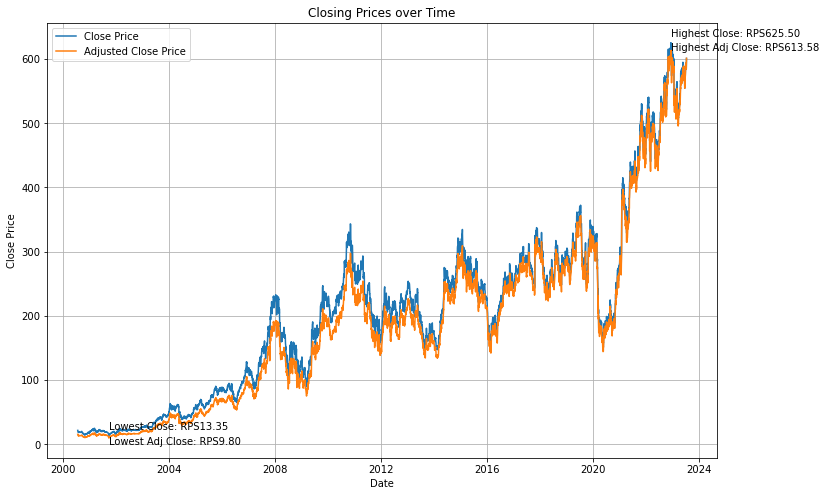

In [3444]:
# Checking the distribution of close values and adjusted close values w.r.t date column
plt.figure(figsize=[12, 8])
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['Adj Close'], label='Adjusted Close Price')
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Close Price')  # Label for the y-axis
plt.title('Closing Prices over Time')  # Title for the plot
plt.grid(True)  # Adding grid lines for better visualization

highest_close_price = data['Close'].max()
highest_close_date = data.loc[data['Close'].idxmax(), 'Date']
plt.annotate(f'Highest Close: RPS{highest_close_price:.2f}', xytext=(highest_close_date, highest_close_price+10), xy=(highest_close_date, highest_close_price))

lowest_close_price = data['Close'].min()
lowest_close_date = data.loc[data['Close'].idxmin(), 'Date']
plt.annotate(f'Lowest Close: RPS{lowest_close_price:.2f}', xytext=(lowest_close_date, lowest_close_price+10), xy=(lowest_close_date, lowest_close_price))

highest_Adj_close_price = data['Adj Close'].max()
highest_Adj_close_date = data.loc[data['Adj Close'].idxmax(), 'Date']
plt.annotate(f'Highest Adj Close: RPS{highest_Adj_close_price:.2f}', xytext=(highest_Adj_close_date, highest_Adj_close_price), xy=(highest_Adj_close_date, highest_Adj_close_price))

lowest_Adj_close_price = data['Adj Close'].min()
lowest_Adj_close_date = data.loc[data['Adj Close'].idxmin(), 'Date']
plt.annotate(f'Lowest Adj Close: RPS{lowest_Adj_close_price:.2f}', xytext=(lowest_Adj_close_date, lowest_Adj_close_price-10), xy=(lowest_Adj_close_date, lowest_Adj_close_price))

plt.legend()

plt.show()

### From the above graph, we can see that the the column 'Adj Close' follows the same trend as the column 'Close'. we will drop the 'Adj Close' column and make 'Close' column as our target variable for prediction. We can see the highest close price obtained is 625.5 RS in year 2022 which is the highest peak of the ghaph. The sharp downtrend in year 2021 is due to COVID-19. But the stock has covered its growth after pandemic.

In [3445]:
# Lets calculate 50, 100 and 500 days moving average with daily closing price 
for n in [50,100,500]:
    data['SMA'+str(n)] = ta.sma(data['Close'], length=n)
    data['EMA'+str(n)] = ta.ema(data['Close'], length=n)
    
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA50,EMA50,SMA100,EMA100,SMA500,EMA500
Date,,,,,,,,,,,,,
2000-07-18,2000-07-18,21.040514,22.172739,21.040514,21.738720,15.594058,40897655,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-19,2000-07-19,21.748156,21.951012,20.875399,21.064102,15.110126,14818453,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-20,2000-07-20,21.078255,21.219784,20.545166,20.743305,14.880004,18257784,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-21,2000-07-21,20.851810,20.946161,20.483837,20.568754,14.754794,13027046,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-24,2000-07-24,20.427225,20.427225,18.733606,18.875134,13.539894,16063259,NaN,NaN,NaN,NaN,NaN,NaN


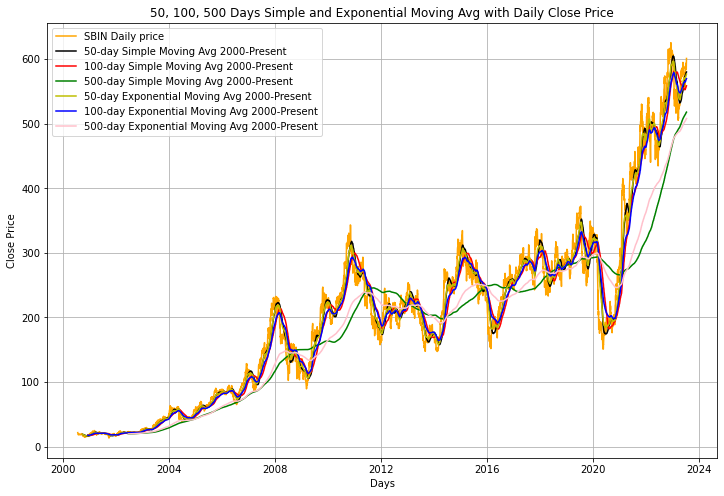

In [3446]:
# Inserting the MA indicators to SBIN daily close price chart to visualize the trend
plt.figure(figsize=[12,8])
plt.plot(data['Close'], label='SBIN Daily price', color='Orange')

plt.plot(data['SMA50'], label= '50-day Simple Moving Avg 2000-Present', color='Black')
plt.plot(data['SMA100'], label= '100-day Simple Moving Avg 2000-Present', color='r')
plt.plot(data['SMA500'], label= '500-day Simple Moving Avg 2000-Present', color='g')

plt.plot(data['EMA50'], label= '50-day Exponential Moving Avg 2000-Present', color='y')
plt.plot(data['EMA100'], label= '100-day Exponential Moving Avg 2000-Present', color='b')
plt.plot(data['EMA500'], label= '500-day Exponential Moving Avg 2000-Present', color='pink')

plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('50, 100, 500 Days Simple and Exponential Moving Avg with Daily Close Price')
plt.grid(True)
plt.legend()

plt.show()

### The graph shows 50, 100, 500 Days Simple and Exponential Moving Avg with Daily Close Price. It is the indicator useful for identifying trends and smoothing out short term fluctuations. We have used the pandas ta library to add technical indicator which describes the movements in historic price data. We will use this indicator to predict the movement of stocks to best determine when to buy, sell or hold.

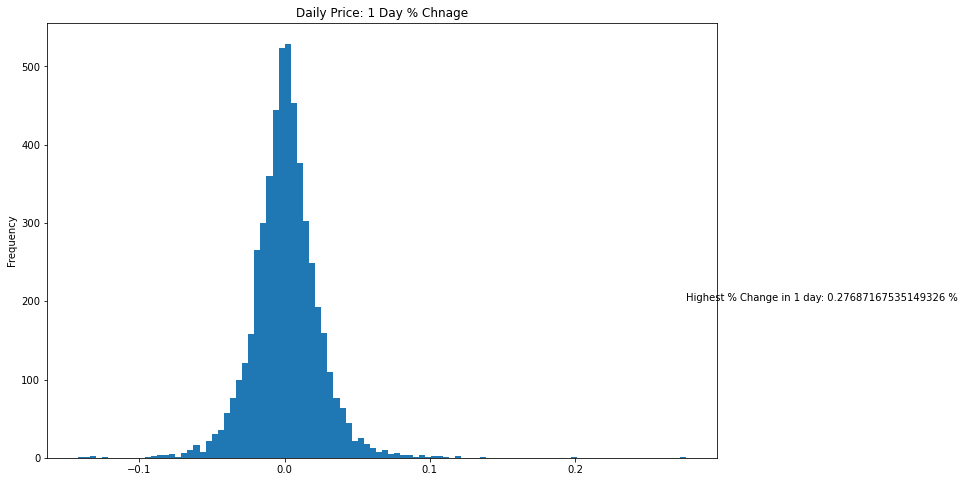

In [3447]:
# Checking the % change in close price over 1 day using pandas pct_change function

data_cleaned = data.dropna() # Droping the null values

plt.figure(figsize=[12,8])
data_cleaned['Close'].pct_change().plot.hist(bins=100)
plt.title('Daily Price: 1 Day % Chnage')

highest_per_change = data_cleaned['Close'].pct_change().max()

plt.annotate(f'Highest % Change in 1 day: {highest_per_change} %', xy=(highest_per_change,0), xytext=(highest_per_change,200))

plt.show()

### The histogram above is normally distributed thus satisfying the assumption of linear regression. One can certainly apply a linear model without validating these assumptions but useful insights are not likely to be had.

In [3448]:
# Checking the first few rows of the data
data_cleaned.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA50,EMA50,SMA100,EMA100,SMA500,EMA500
Date,,,,,,,,,,,,,
2002-06-17,2002-06-17,24.106956,24.106956,23.139849,23.314400,17.119078,11821964,21.794859,21.724870,21.884965,21.371632,19.666201,19.666201
2002-06-18,2002-06-18,23.588020,23.588020,23.172871,23.262506,17.080975,5321949,21.815994,21.785169,21.919168,21.409075,19.669248,19.680557
2002-06-19,2002-06-19,23.493668,23.772007,22.380314,22.550148,16.557909,13144903,21.820712,21.815169,21.941860,21.431670,19.672220,19.692013
2002-06-20,2002-06-20,22.550148,23.238918,22.281244,22.913403,16.824633,23044228,21.821278,21.858237,21.972854,21.461012,19.676561,19.704873
2002-06-21,2002-06-21,22.974731,23.097389,22.380314,22.493536,16.516338,10172546,21.812220,21.883150,21.997669,21.481458,19.680410,19.716005


### New columns are created.

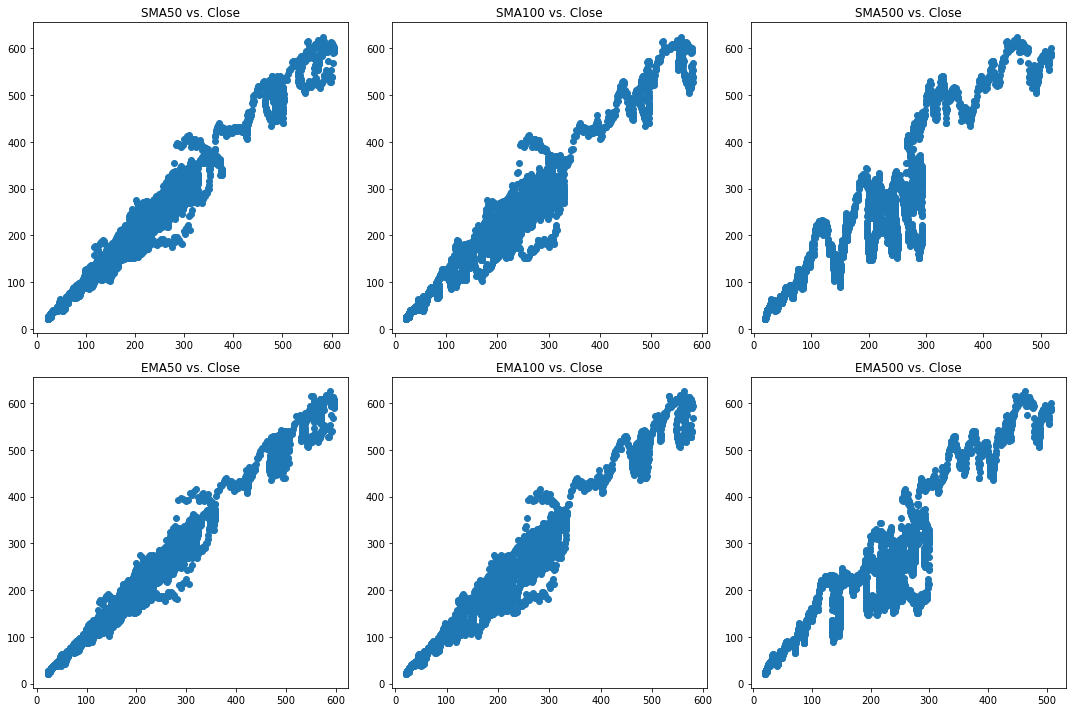

In [3449]:
# Checking the relation between newly created vars and target var by using scatterplot
f, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].scatter(data_cleaned['SMA50'], data_cleaned['Close'])
ax[0, 0].set_title('SMA50 vs. Close')

ax[0, 1].scatter(data_cleaned['SMA100'], data_cleaned['Close'])
ax[0, 1].set_title('SMA100 vs. Close')

ax[0, 2].scatter(data_cleaned['SMA500'], data_cleaned['Close'])
ax[0, 2].set_title('SMA500 vs. Close')

ax[1, 0].scatter(data_cleaned['EMA50'], data_cleaned['Close'])
ax[1, 0].set_title('EMA50 vs. Close')

ax[1, 1].scatter(data_cleaned['EMA100'], data_cleaned['Close'])
ax[1, 1].set_title('EMA100 vs. Close')

ax[1, 2].scatter(data_cleaned['EMA500'], data_cleaned['Close'])
ax[1, 2].set_title('EMA500 vs. Close')

plt.tight_layout()
plt.show()

### There is a linear pattern observed between independent vars and target var.

In [3450]:
# Checking for presence of any null vals
data_cleaned.isnull().sum()

# Make a list of features and target
feat = ['SMA50', 'SMA100', 'SMA500', 'EMA50', 'EMA100', 'EMA500']
target = ['Close']

# Crating new dataframe feat_tar_df
feat_tar_df = data_cleaned[target + feat]
feat_tar_df.head()

,Close,SMA50,SMA100,SMA500,EMA50,EMA100,EMA500
Date,,,,,,,
2002-06-17,23.314400,21.794859,21.884965,19.666201,21.724870,21.371632,19.666201
2002-06-18,23.262506,21.815994,21.919168,19.669248,21.785169,21.409075,19.680557
2002-06-19,22.550148,21.820712,21.941860,19.672220,21.815169,21.431670,19.692013
2002-06-20,22.913403,21.821278,21.972854,19.676561,21.858237,21.461012,19.704873
2002-06-21,22.493536,21.812220,21.997669,19.680410,21.883150,21.481458,19.716005


### We have created new dataset which contains 7 predictor vars and 1 target var.

In [3451]:
# Checking the correlation between features and target 
corr = feat_tar_df.corr()

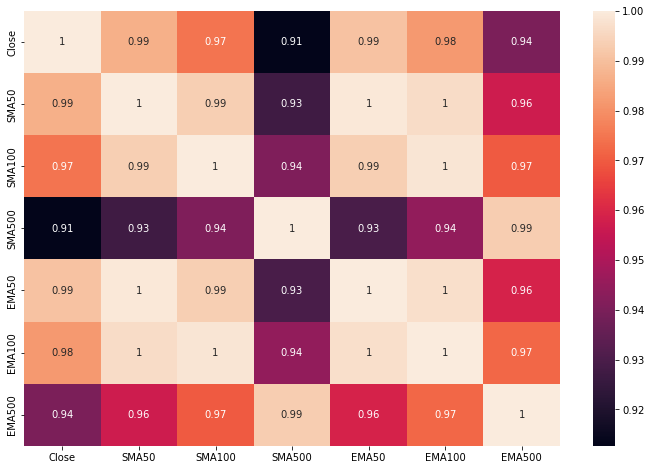

In [3452]:
# Visualizing the correlation using heatmap
plt.figure(figsize=[12,8])
sns.heatmap(corr, annot=True)
plt.show()

### We can see there is a high +ve correlation between MA vars and target var. 

In [3453]:
# Splitting the data into train and test sets
X_train = feat_tar_df[feat_tar_df.index <= datetime.datetime(2013, 7, 17)][['SMA50', 'SMA100', 'SMA500', 'EMA50', 'EMA100', 'EMA500']]
y_train = feat_tar_df[feat_tar_df.index <= datetime.datetime(2013, 7, 17)]['Close']

X_test = feat_tar_df[feat_tar_df.index > datetime.datetime(2013, 7, 17)][['SMA50', 'SMA100', 'SMA500', 'EMA50', 'EMA100', 'EMA500']]
y_test = feat_tar_df[feat_tar_df.index > datetime.datetime(2013, 7, 17)]['Close']

print(f'X Train: {X_train.shape}')
print(f'y Train: {y_train.shape}')
print()
print(f'X Test: {X_test.shape}')
print(f'y Test: {y_test.shape}')

X Train: (2775, 6)
y Train: (2775,)

X Test: (2464, 6)
y Test: (2464,)


### We cant use sklearns train-test-split for splitting the data as it shuffles the data randomly. We created the training and testing datasets using python indexing. 


In [3454]:
# Scaling the features of training dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

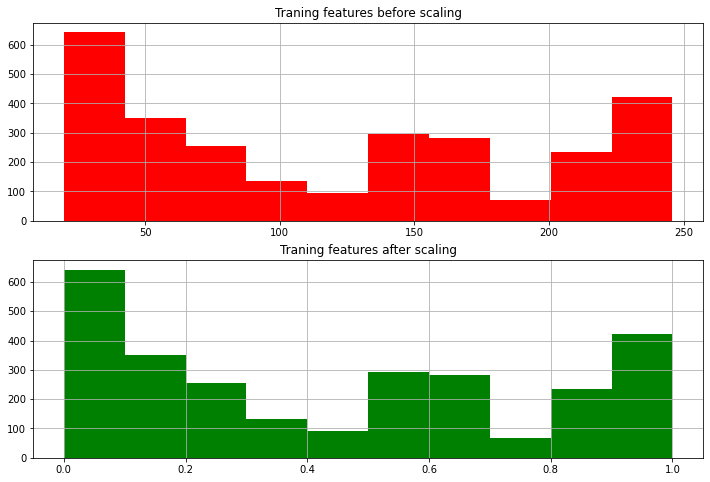

In [3455]:
# Visualizing the training features before and after scaling
f, ax = plt.subplots(2,1, figsize=[12,8])
ax[0].hist(X_train.iloc[:,2], color = 'r') # Before scaling
ax[0].set_title('Traning features before scaling')
ax[0].grid(True)

ax[1].hist(X_train_scaled[:,2], color = 'g') # After scaling
ax[1].set_title('Traning features after scaling')
ax[1].grid(True)
plt.show()

### The frequency plot of values present in features before scaling and after scaling are same.

In [3456]:
# Build and train the model for scaled features
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [3457]:
# Checking the coefficients and intercept given by the linear model
print(lm.coef_)
print()
print(lm.intercept_)

[-590.05989241  -96.85853487    1.74130832 1147.14955022 -182.34172576
    9.94871905]

22.76167727112835


### We got 6 coefficients for 6 features and 1 intercept for the model.

In [3458]:
# Now, make predictions on test data
y_test_pred = lm.predict(X_test_scaled)

In [3459]:
# Creating dataframe of actual and predicted target var
comparison = pd.DataFrame({'Actual Close Price': y_test, 'Predicted Close Price': y_test_pred})
comparison.head(10)

,Actual Close Price,Predicted Close Price
Date,,
2013-07-18,182.425003,183.749856
2013-07-19,181.130005,183.127453
2013-07-22,182.470001,182.694626
2013-07-23,186.095001,182.772624
2013-07-24,180.125000,182.698474
2013-07-25,179.815002,182.799579
2013-07-26,176.524994,182.703878
2013-07-29,174.005005,182.430182
2013-07-30,172.330002,181.926052


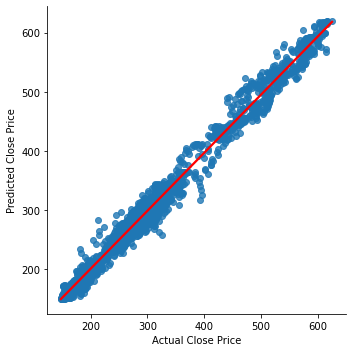

In [3460]:
# Evaluating the results using scatterplot
sns.lmplot(x='Actual Close Price', y='Predicted Close Price', data=comparison, order=2, line_kws={'color': 'r'})
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.show()

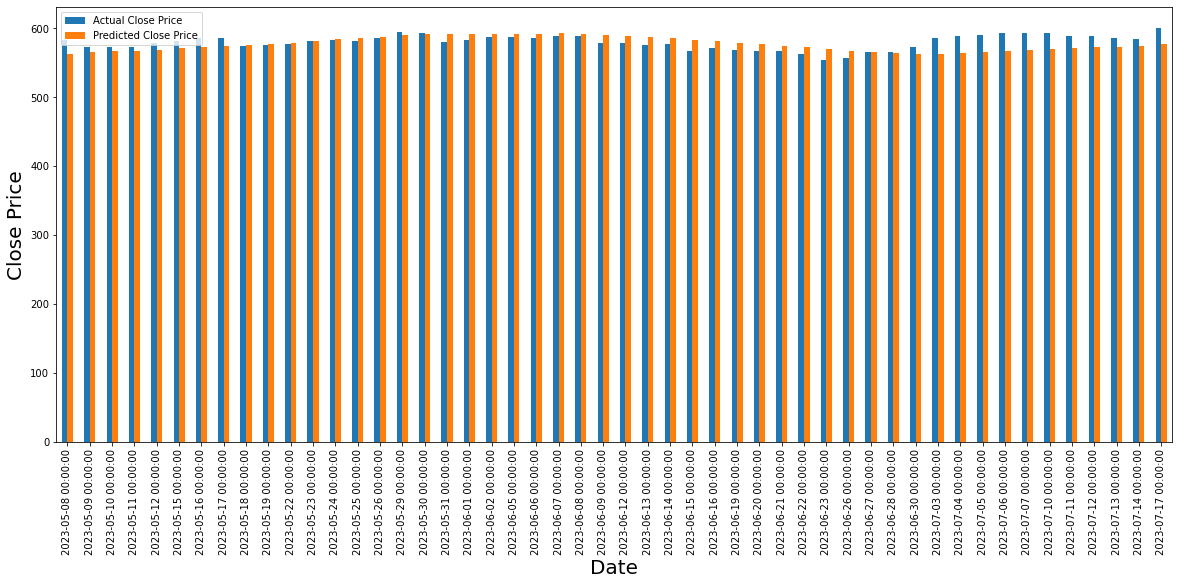

In [3461]:
# Evaluating the results using barplot
comparison.tail(50).plot(kind='bar', figsize=(20,8))
plt.xlabel('Date', fontdict={'fontsize':20})
plt.ylabel('Close Price', fontdict={'fontsize':20})
plt.show()

In [3462]:
# Adding new columns to comparison df to make decisions on sell, buy or hold
comparison['SMA50'] = X_test['SMA50'].values

comparison['EMA50'] = X_test['EMA50'].values


data_cleaned = data_cleaned.loc[comparison.index]
comparison['Open Price'] = data_cleaned['Open'].values

comparison['Difference'] = data_cleaned['Open'] - comparison['Predicted Close Price']
comparison.head(20)

,Actual Close Price,Predicted Close Price,SMA50,EMA50,Open Price,Difference
Date,,,,,,
2013-07-18,182.425003,183.749856,205.309001,200.725509,181.300003,-2.449853
2013-07-19,181.130005,183.127453,204.344401,199.957058,182.899994,-0.227459
2013-07-22,182.470001,182.694626,203.438401,199.271291,180.699997,-1.994629
2013-07-23,186.095001,182.772624,202.574201,198.754574,183.800003,1.027379
2013-07-24,180.125000,182.698474,201.411201,198.024002,182.000000,-0.698474
2013-07-25,179.815002,182.799579,200.168801,197.309924,179.399994,-3.399585
2013-07-26,176.524994,182.703878,198.849601,196.494828,181.100006,-1.603872
2013-07-29,174.005005,182.430182,197.506101,195.612875,176.725006,-5.705176
2013-07-30,172.330002,181.926052,196.231301,194.699821,174.425003,-7.501049


### The difference between Open value and predicted close price value is added in Difference column for all observations.

In [3463]:
# Making Decisions
comparison['Decision'] = comparison['Difference'].apply(lambda x: 'Sell' if x>0 else('Buy' if x<0 else 'Hold'))
comparison.head(10)

,Actual Close Price,Predicted Close Price,SMA50,EMA50,Open Price,Difference,Decision
Date,,,,,,,
2013-07-18,182.425003,183.749856,205.309001,200.725509,181.300003,-2.449853,Buy
2013-07-19,181.130005,183.127453,204.344401,199.957058,182.899994,-0.227459,Buy
2013-07-22,182.470001,182.694626,203.438401,199.271291,180.699997,-1.994629,Buy
2013-07-23,186.095001,182.772624,202.574201,198.754574,183.800003,1.027379,Sell
2013-07-24,180.125000,182.698474,201.411201,198.024002,182.000000,-0.698474,Buy
2013-07-25,179.815002,182.799579,200.168801,197.309924,179.399994,-3.399585,Buy
2013-07-26,176.524994,182.703878,198.849601,196.494828,181.100006,-1.603872,Buy
2013-07-29,174.005005,182.430182,197.506101,195.612875,176.725006,-5.705176,Buy
2013-07-30,172.330002,181.926052,196.231301,194.699821,174.425003,-7.501049,Buy


In [3464]:
# Checking the value counts of Decision column
comparison['Decision'].value_counts()

Sell    1296
Buy     1168
Name: Decision, dtype: int64

In [3465]:
# Adding the residuals to comparison
comparison['Residual'] = comparison['Actual Close Price'] - comparison['Predicted Close Price']
comparison.head()

,Actual Close Price,Predicted Close Price,SMA50,EMA50,Open Price,Difference,Decision,Residual
Date,,,,,,,,
2013-07-18,182.425003,183.749856,205.309001,200.725509,181.300003,-2.449853,Buy,-1.324853
2013-07-19,181.130005,183.127453,204.344401,199.957058,182.899994,-0.227459,Buy,-1.997448
2013-07-22,182.470001,182.694626,203.438401,199.271291,180.699997,-1.994629,Buy,-0.224625
2013-07-23,186.095001,182.772624,202.574201,198.754574,183.800003,1.027379,Sell,3.322377
2013-07-24,180.125000,182.698474,201.411201,198.024002,182.000000,-0.698474,Buy,-2.573474


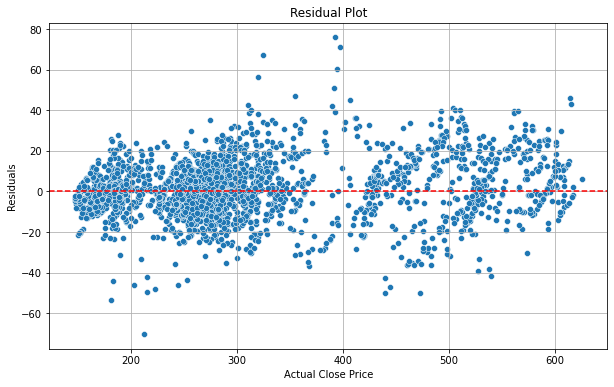

In [3466]:
# Scatter plot of residuals against Actual Close Price
plt.figure(figsize=[10, 6])
sns.scatterplot(x='Actual Close Price', y='Residual', data=comparison)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Close Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

### The residuals are randomly spread across the mean. There is no pattern observed in residual distribution. Hence our linear regression assumption is satisfied.

In [3467]:
y_train_pred = lm.predict(X_train_scaled)

In [3468]:
# Evaluating the parameters
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

print(f'Training (r2_score): {r2_score(y_train, y_train_pred)}')
print(f'Testing (r2_score): {r2_score(y_test, y_test_pred)}')
print()
print(f'Training (mean_squared_error): {mean_squared_error(y_train, y_train_pred)}')
print(f'Testing (mean_squared_error): {mean_squared_error(y_test, y_test_pred)}')
print()
print(f'Training (mean_absolute_error): {mean_absolute_error(y_train, y_train_pred)}')
print(f'Testing (mean_absolute_error): {mean_absolute_error(y_test, y_test_pred)}')

Training (r2_score): 0.9917579346899744
Testing (r2_score): 0.9862786066102226

Training (mean_squared_error): 54.61758306775181
Testing (mean_squared_error): 192.32369216308942

Training (mean_absolute_error): 5.184374986151104
Testing (mean_absolute_error): 10.272719695037928


### 2) RIDGE REGRESSION

In [3469]:
# Build and train model using Ridge Regularization model
from sklearn.linear_model import Ridge

lambdas = [0,0.002,0.02,0.08,0.1,0.5,1,10,100]
best_r2_score = -float('inf')
best_alpha = None
for i in lambdas:
    ridge_model = Ridge(alpha = i)
    
    ridge_model.fit(X_train_scaled, y_train)

    # Prediction on test data
    y_test_pred_ridge = ridge_model.predict(X_test_scaled)

    # Calculate R2 score for test data
    r2score = r2_score(y_test, y_test_pred_ridge)
    
    if r2score > best_r2_score:
        best_r2_score = r2score
        best_alpha = i
        
        
# Initializing the final ridge model with best alpha and fitting the data
ridge_model_final = Ridge(alpha=best_alpha)
ridge_model_final.fit(X_train_scaled, y_train)
    
# Final Prediction on train data
y_train_pred_ridge_final = ridge_model_final.predict(X_train_scaled)

# Final Prediction on test data
y_test_pred_ridge_final = ridge_model_final.predict(X_test_scaled)

# Evaluating the metrics to check model performance
print(f'Best alpha: {best_alpha}')
print()
print(f'Training (r2_score): {r2_score(y_train, y_train_pred_ridge_final)}')
print(f'Testing (r2_score): {r2_score(y_test, y_test_pred_ridge_final)}')
print()
print(f'Training (mean_squared_error): {mean_squared_error(y_train, y_train_pred_ridge_final)}')
print(f'Testing (mean_squared_error): {mean_squared_error(y_test, y_test_pred_ridge_final)}')
print()
print(f'Training (mean_absolute_error): {mean_absolute_error(y_train, y_train_pred_ridge_final)}')
print(f'Testing (mean_absolute_error): {mean_absolute_error(y_test, y_test_pred_ridge_final)}')

Best alpha: 0

Training (r2_score): 0.9917579346899744
Testing (r2_score): 0.9862786066102227

Training (mean_squared_error): 54.61758306775182
Testing (mean_squared_error): 192.3236921630882

Training (mean_absolute_error): 5.184374986150946
Testing (mean_absolute_error): 10.272719695037875


### 3) LASSO REGRESSION

In [3470]:
# Build and train model using Lasso Regularization model
from sklearn.linear_model import Lasso

lambdas = [0,0.002,0.02,0.08,0.1,0.5,1,10,100]
best_r2_score = -float('inf')
best_alpha = None
for i in lambdas:
    lasso_model = Lasso(alpha = i)
    
    lasso_model.fit(X_train_scaled, y_train)

    # Prediction on test data
    y_test_pred_lasso = lasso_model.predict(X_test_scaled)

    # Calculate R2 score for test data
    r2score = r2_score(y_test, y_test_pred_lasso)
    
    if r2score > best_r2_score:
        best_r2_score = r2score
        best_alpha = i
        
        
# Initializing the final ridge model with best alpha and fitting the data
lasso_model_final = Lasso(alpha=best_alpha)
lasso_model_final.fit(X_train_scaled, y_train)
    
# Final Prediction on train data
y_train_pred_lasso_final = lasso_model_final.predict(X_train_scaled)

# Final Prediction on test data
y_test_pred_lasso_final = lasso_model_final.predict(X_test_scaled)

# Evaluating the metrics to check model performance
print(f'Best alpha: {best_alpha}')
print()
print(f'Training (r2_score): {r2_score(y_train, y_train_pred_lasso_final)}')
print(f'Testing (r2_score): {r2_score(y_test, y_test_pred_lasso_final)}')
print()
print(f'Training (mean_squared_error): {mean_squared_error(y_train, y_train_pred_lasso_final)}')
print(f'Testing (mean_squared_error): {mean_squared_error(y_test, y_test_pred_lasso_final)}')
print()
print(f'Training (mean_absolute_error): {mean_absolute_error(y_train, y_train_pred_lasso_final)}')
print(f'Testing (mean_absolute_error): {mean_absolute_error(y_test, y_test_pred_lasso_final)}')

Best alpha: 0.02

Training (r2_score): 0.9889657770389372
Testing (r2_score): 0.9820848332587658

Training (mean_squared_error): 73.12033652910694
Testing (mean_squared_error): 251.10503835262665

Training (mean_absolute_error): 6.054846558513514
Testing (mean_absolute_error): 11.787542141969332
